In [1]:
# Test if the final file is read properly

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Import the local utils.py file
import sys
sys.path.append(os.path.join(os.getcwd(), '../'))
from preprocessing.preprocessing_utils import build_df

In [3]:
df = build_df(verbose=True)

Checking if all the files have enough leading zeros...
Ensuring all the files have enough leading zeros...


Preprocessing files using 8 workers: 100%|██████████| 5/5 [00:08<00:00,  1.73s/it]


Saving dataframe fragments...


Saving: 100%|██████████| 5/5 [00:15<00:00,  3.12s/it]


Reading dataframe fragments...


Reading: 100%|██████████| 18/18 [00:36<00:00,  2.02s/it]


The "Timestamp" column is not sorted. Sorting...
Sorting done. (1.1s)
Resetting index...
Index reset. (2.1s)
8 columns have nan values:
- Read Activity [%].3
- Write Activity [%].3
- Total Activity [%].3
- Read Rate [MB/s].3
- Write Rate [MB/s].3
- Read Total [MB].3
- iGPU [V]
- Write Total [MB].1
Dropped 8 columns with nan values
No nan values in the Interval column.
Updating weather data...
Loading weather dataframe
Requested end date (1654900320) is more than one hour after the last stored date (1654891200). Updating weather dataframe
Weather dataframe is already up to date
Weather data updated. (0.4s)


In [4]:
# Compute the total time spent logging from the Timestamp column (which is in seconds) in hours
# Since the 'Timestamp' column also contains the pauses between measurements, we need to remove the pauses

# Define which intervals count as a pause (>= 10s)
minimum_pause_length = 10

# Define a boolean mask for the pauses
no_pause_mask = df['Interval'] < minimum_pause_length

# Compute the total time spent logging
total_time_logging = np.sum(df['Interval'][no_pause_mask]) / 3600
print(f'Total time spent logging: {total_time_logging:.2f} hours')

Total time spent logging: 235.41 hours


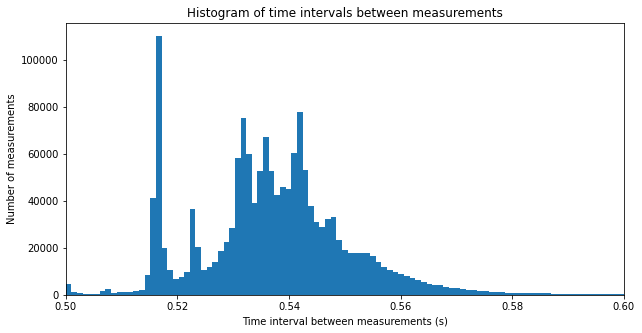

In [5]:
# Show a histogram of the time intervals between measurements
dt_selection = df['Interval'][no_pause_mask & (df['Interval'] >= 0.5) & (df['Interval'] <= 0.6)]

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(dt_selection, bins=np.linspace(0.5, 0.6, 100));
ax.set_xlabel('Time interval between measurements (s)')
ax.set_ylabel('Number of measurements')
ax.set_title('Histogram of time intervals between measurements');
ax.set_xlim(0.5, 0.6);
# ax.set_yscale('log');